# Entrega 3

**1)Toma dos imágenes de un mismo paisaje desde distintas perspectivas, entre las
cuales exista parte común (una a continuación de la otra, como se muestra en las
imágenes de ejemplo “paisaje1.jpg” y “paisaje2.jpg”**).

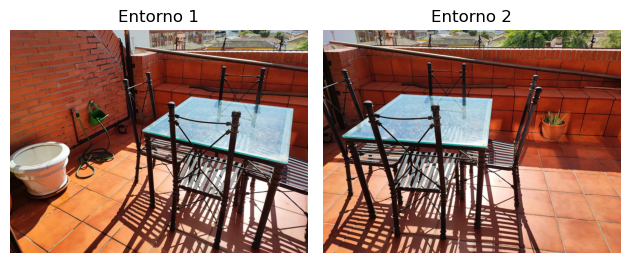

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import argparse
import cv2 as cv

# Cargamos las imágenes
imagen1 = cv2.imread('t1.jpg')
imagen2 = cv2.imread('t2.jpg')

# matplotlib usa RGB
imagen1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
imagen2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)

# Usamos subplot para mostrar las imagenes
fig, axs = plt.subplots(1, 2)

axs[0].imshow(imagen1)
axs[0].set_title('Entorno 1')
axs[0].axis('off')

axs[1].imshow(imagen2)
axs[1].set_title('Entorno 2')
axs[1].axis('off')

plt.tight_layout()

# Mostrarlas
plt.show()


**2)El siguiente fragmento de código (modificado a partir de https://docs.opencv.org/3.4/d5/dde/tutorial_feature_description.html) utiliza SIFT (cv.SIFT_create()) para calcular puntos de interés en el par de imágenes “paisaje1.jpg” y “paisaje2.jpg”. Ejecuta el código para calcular los puntos de interés en las imágenes que has tomado y responde a las siguientes cuestiones:**

In [2]:
img1 = cv2.imread("t1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("t2.jpg", cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print('No se pudieron abrir las imágenes')
    exit(0)
    
sift = cv2.SIFT_create()
# calculamos los puntos de interes
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

**a) ¿Cúantos puntos característicos ha seleccionado SIFT al aplicarlo sobre
cada una de las imágenes que has tomado?**

Los puntos característicos se almacenan con el código anterior en la variables keypoints

In [3]:
# Mostramos el número de puntos característicos seleccionados
print("Nº de puntos característicos seleccionados para entorno 1:", len(keypoints1))
print("Nº de puntos característicos seleccionados para entorno 2:", len(keypoints2))

Nº de puntos característicos seleccionados para entorno 1: 4866
Nº de puntos característicos seleccionados para entorno 2: 4900


**b) ¿Qué información, almacenada en las variables descriptors1 y
descriptors2, devuelve el método SIFT una vez ejecutado?**

Cada descriptor en mi caso es un vector de 128 elementos, estos vectores obtenidos representan las características locales de los puntos clave detectados en una imagen (Los descriptores contienen la información sobre la apariencia y la distribución de intensidad de los pixeles alrededor de los puntos clave)

In [4]:
print(descriptors1.shape)
print(descriptors2.shape)

(4866, 128)
(4900, 128)


**c) Modifica el código para que los descriptores sean calculados usando ORB
y compara el resultado con el obtenido por SIFT.**

In [5]:
# En este caso usamos ORB, por lo que llamamos a ORB_create en vez de SIFT_create
orb = cv2.ORB_create()

# Detectamos puntos clave y descriptores para las imágenes
orbKeypoints1, orbDescriptors1 = orb.detectAndCompute(img1, None)
# Lo mismo para la segunda imagen
orbKeypoints2, orbDescriptors2 = orb.detectAndCompute(img2, None)

# Mostramos el número de puntos características seleccionados y el tamaño de los descriptores
print("Nº de puntos característicos con ORB seleccionados para entorno de la imagen 1", len(orbKeypoints1))
print("Nº de puntos característicos con SIFT seleccionados para entorno de la imagen 1:", len(keypoints1))
print("\n")

print("Nº de puntos característicos con ORB seleccionados para entorno de la imagen 2", len(orbKeypoints2))
print("Nº de puntos característicos con SIFT seleccionados para entorno de la imagen 2:", len(keypoints2))

print("\n")
print("Tamaños de los descriptores")
print(orbDescriptors1.shape)
print(descriptors1.shape)

Nº de puntos característicos con ORB seleccionados para entorno de la imagen 1 500
Nº de puntos característicos con SIFT seleccionados para entorno de la imagen 1: 4866


Nº de puntos característicos con ORB seleccionados para entorno de la imagen 2 500
Nº de puntos característicos con SIFT seleccionados para entorno de la imagen 2: 4900


Tamaños de los descriptores
(500, 32)
(4866, 128)


Podemos ver en este caso que obtenemos alrededor de 5000 puntos en SIFT mientrás que en las dos imágenes con ORB, hemos obtenido 500 para ambis.SIFT se está adaptando mejor de forma dinámica ya que calcula los puntos automaticamente, mientrás que en ORB por defecto está limitado en 500. 

Podemos comparar también el tamaño de los descriptores, ya que se puede observar que ORB son vectores de 32 mientrás que SIFT son de 128, esto se debe a que ORB usa descriptores compactos buscando la eficiencia computacional usando el algoritmo BRIEF, mientrás que SIFT usa un enfoque más complejo para casos donde se necesite mayor precisión

**d) Dibuja utilizando la función cv.drawKeypoints los puntos obtenidos por cada
uno de los dos métodos**

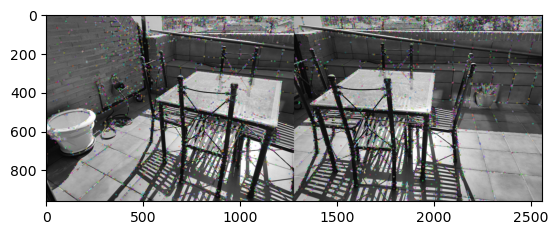

In [6]:
# Dibujamos los puntos clave para sift
img1_sift = cv2.drawKeypoints(img1, keypoints1, None)
img2_sift = cv2.drawKeypoints(img2, keypoints2, None)
# Hacemos lo mismo para orb
img1_orb = cv2.drawKeypoints(img1, orbKeypoints1, None)
img2_orb = cv2.drawKeypoints(img2, orbKeypoints2, None)

# Vemos como que el resultado para sift
combinadas_sift = cv2.hconcat([img1_sift,img2_sift])
plt.imshow(combinadas_sift, cmap='gray')

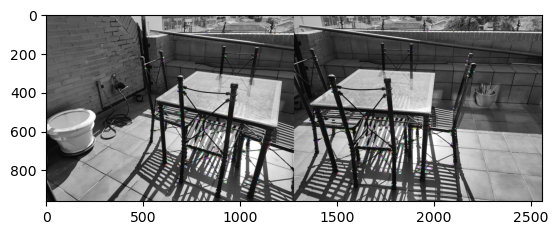

In [7]:
# mostramos tambien el caso con ORB
combinadas_Orb = cv2.hconcat([img1_orb,img2_orb])
plt.imshow(combinadas_Orb, cmap='gray')

**3). La función cv.DescriptorMatcher_create de OpenCV permite instanciar unmétodo de correspondencia para emparejar puntos de interés**

**a) Aplica el siguiente fragmento de código para calcular dicho
emparejamiento entre los puntos característicos obtenidos por SIFT en el
apartado anterior. Observa que la función “match” encuentra la mejor
correspondencia en “descriptors2” para cada uno de los descriptores en
“descriptors1**

Lo primero que voy a hacer es limitar el número de features , ya que SIFT por defecto me ha detectado antes entre 4500 y 5500 y aunque se puede intuir un pococ siguiendo las líneas, prefiero limirar el nº de estas, así que vamos a dejarlas en 500 como orb, así que llamaré al mismo metodo que al principio pero con un nfeatures limitado

In [8]:
sift = cv2.SIFT_create(nfeatures=500)
#sift = cv2.SIFT_create() # Sin limite
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [9]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE)
matches = matcher.match(descriptors1, descriptors2)

**b) ¿Qué distancia se ha utilizado por defecto? Razona si se trata o no de una
distancia adecuada.**

Podemos ver que por defecto llamando al metodo con DescriptorMatcher_BRUTEFORCE usa un distancia L2. Otras opciones son:

 -   `BruteForce` (it uses L2 )
 -   `BruteForce-L1`
-   `BruteForce-Hamming`
-   `BruteForce-Hamming(2)`
-   `FlannBased`

Pienso que la distancia en mi caso es adecuada, es la distancia por defecto ya que normalmente es la mejor alternativa, en caso de presencia de mucho ruido o de iluminación muy variable hubiese sido mejor la L1 o Hamming, pero no es el caso de mis imágenes. Otro caso sería si usasemos ORB que en dicho caso recomendaría usar distancia hamming

**c) Testea otras posibles distancias de entre las que oferta OpenCV para
matching, y utiliza la función cv.drawMatches para dibujar los
emparejamientos obtenidos y comparar los resultados.**

Vamos a probar con dos distancias distintas, en este caso L2(la que ya hemos visto), L1 y Flann y compararlas

In [10]:
# Usamos L1
matcher_L2 = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_L1)
matches_L2 = matcher_L2.match(descriptors1, descriptors2)

# Usamos Flann
matcher_flan = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
matches_flan= matcher_flan.match(descriptors1, descriptors2)

Esta primera es la misma que antes con distancia L2, para verlas a la vez las 3 alternativas

In [11]:
#obtenemos los matches como en el ejemplo de la documentacion 
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)

# vetana de tamaño libre ya que se salen de la pantalla
cv2.namedWindow("Matches", cv2.WINDOW_NORMAL)   
# Ajusto a mi pantalla
imS = cv2.resize(img_matches, (1920, 1080)) 
# Muestro
cv2.imshow("Matches", imS)                       
cv2.waitKey(0)  

113

In [12]:
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_flan, img_matches)

# vetana de tamaño libre ya que se salen de la pantalla
cv2.namedWindow("Matches", cv2.WINDOW_NORMAL)   
# Ajusto a mi pantalla
imS = cv2.resize(img_matches, (1920, 1080)) 
# Muestro
cv2.imshow("Matches", imS)                       
cv2.waitKey(0)  

113

In [38]:
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_L2, img_matches)

# vetana de tamaño libre ya que se salen de la pantalla
cv2.namedWindow("Matches", cv2.WINDOW_NORMAL)   
# Ajusto a mi pantalla
imS = cv2.resize(img_matches, (1920, 1080)) 
# Muestro
cv2.imshow("Matches", imS)                       
cv2.waitKey(0)  

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1250: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


En mi caso para las 3 distancias no noto diferencias sustanciales, se esta centrando principalmente entre las dos imágenes en las sillas y mesa de hierro como puntos de interés. Este caso en el que independientemente de la distancia de unos puntos de interés parecidos, puede deberse a que las zonas están claramente diferencia del resto del entorno dando así puntos de interés de grán interés.

**d) Modifica el código anterior para realizar un emparejamiento de los puntos característicos obtenidos en el apartado anterior mediante ORB, y
comenta qué distancia has decidido usar en este caso y por qué.**

In [13]:
# En este caos usamos ORB
orb = cv2.ORB_create(nfeatures=500)

# Detectamos puntos clave y descriptores para las imágenes
orbKeypoints1, orbDescriptors1 = orb.detectAndCompute(img1, None)
orbKeypoints2, orbDescriptors2 = orb.detectAndCompute(img2, None)

# Hamming una buena opcion ya que estamos ahora con ORB
matcher_H = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches_H = matcher_H.match(orbDescriptors1, orbDescriptors2)

#Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, orbKeypoints1, img2, orbKeypoints2, matches_H, img_matches)

# vetana de tamaño libre ya que se salen de la pantalla
cv2.namedWindow("Matches", cv2.WINDOW_NORMAL)   
# Ajusto a mi pantalla
imS = cv2.resize(img_matches, (1920, 1080)) 
# Muestro
cv2.imshow("Matches", imS)                       
cv2.waitKey(0)  

-1

He decidido usar una distancia Hamming ya que ORB usa descriptores binarios y Hamming es adecuada para comparar este tipo de descriptores.

La distancia de Hamming sirve para calcular el número de bits diferentes entre dos cadenas de bits, lo que viene bien para los descriptores binarios que nos da orb.

**4) OpenCV proporciona una serie de métodos para determinar correspondencias.
Un tutorial sobre el uso de estos métodos puede encontrarse en 
https://docs.opencv.org/4.9.0/dc/dc3/tutorial_py_matcher.ht l
Incluye la librería FLANN (Fast Library for Approximate Nearest Neighbour),  ue
es una librería para realizar búsquedas rápidas aproximadas de vecinos más
cercanos en espacios de alta dime**flann)

**a) Modifica el código del apartado anterior para utilizar estos métodos
optimizados, tanto en el caso de descriptores obtenidos con ORB como
en el de los descriptores obtenidos por SIFT.**

Vamos a reutilizar y editar el codigo de la documentación dada en el enunciado modificando para usar nuestras imágenes y valores

### SIFT

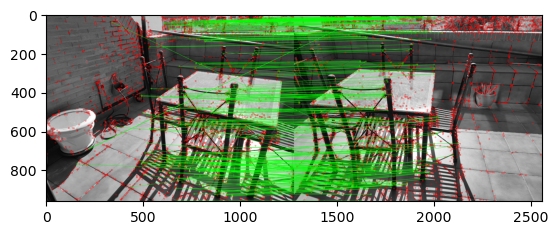

(<matplotlib.image.AxesImage at 0x1b0cb43c750>, None)

In [14]:
sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.6*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

### ORB

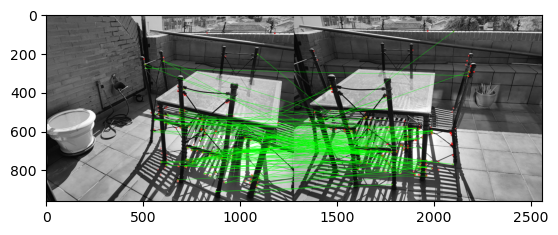

(<matplotlib.image.AxesImage at 0x1b0cb5b3c10>, None)

In [15]:
orb = cv.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# COn ORB tengo que convetir los descriptores a float32 si no da error
des1 = des1.astype(np.float32)
des2 = des2.astype(np.float32)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.9*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

**b) Utiliza la función cv.drawMatchesKnn para visualizar los
emparejamientos obtenidos por ambos métodos y comenta los
resultados comparándolos con los obtenidos en el apartado anterior.**

En el apartado anterior directamente muestro ya con KNN(drawMatchesKnn) los emparejamientos, así que en este apartado comentaré los resultados

En SIFT he modificado el valor con el que se obtiene los valores de match para que el número de matches sea algo menor y se pueda valorar de forma visual algo mejor.

Si quisieramos aumentar el numero de coincidencias debemos aumentar el valor en la siguiente linea:
    if m.distance < 0.6(a mayor valor tendremos más coincidencias)*n.distance:

Como se pueden ver en las imágenes en SIFT defecta muchos puntos en las paredes y elementos del entorno , pero al igual que ORB se centra en las sillas, esto creo que se debe ya que se detectan en esta parte de la imagen características bien definidas y distintivas con el entorno.

**5. El siguiente fragmento de código permite seleccionar únicamente aquellos emparejamientos en los que el NDDR test supere un determinado umbral, y los utiliza para calcular una homografía que permita crear una imagen panorámica a partir de las imágenes de las cuales estos emparejamientos fueron calculados. Selecciona la correspondencia (o matching) que consideres oportuno de entre las obtenidas en los apartados anteriores, y utilízala para ejecutar el siguiente código en el cual debes:**

Lo primero que hacemos es cargar el código que nos dan en el enunciado para poder ejecutar estos métodos

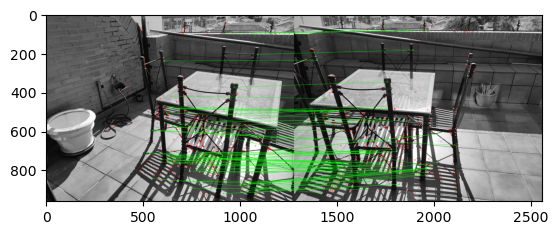

(<matplotlib.image.AxesImage at 0x1b0cb3ec290>, None)

In [16]:
# Initiate SIFT detector
sift = cv2.SIFT_create(nfeatures=500)

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [17]:
# Warp img2 to img1 using the homography matrix H
def warpImages(img1, img2, H):
     rows1, cols1 = img1.shape[:2]
     rows2, cols2 = img2.shape[:2]
     list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1,rows1],
    [cols1,0]]).reshape(-1,1,2)
     temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-
    1,1,2)
     list_of_points_2 = cv2.perspectiveTransform(temp_points, H)
     list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)
     [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
     [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)
     translation_dist = [-x_min, -y_min]
     H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]],
    [0,0,1]])
     output_img = cv2.warpPerspective(img2, H_translation.dot(H), (x_max-x_min,
    y_max-y_min))
     output_img[translation_dist[1]:rows1+translation_dist[1],
    translation_dist[0]:cols1+translation_dist[0]] = img1
     return output_img

In [18]:
good_matches = []
threshold = 0.8

for m1, m2 in matches:
    if m1.distance < threshold * m2.distance:
        good_matches.append(m1)
        
if len(good_matches) > 4:
    src_pts = np.float32([keypoints1[good_match.queryIdx].pt for good_match in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[good_match.trainIdx].pt for good_match in good_matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    result = warpImages(img2, img1, M)
    cv2.imwrite('panorama_result.jpg', result)  # Guardar la imagen panorámica
    cv2.imshow('Stitched output', result)
    cv.waitKey()
    if cv.waitKey(0) & 0xff == 27:  # ESC para salir
        cv.destroyAllWindows()
else:
    print("No hay suficientes correspondencias entre las dos imágenes")
    print("Se encontraron sólo %d. Se necesitan al menos %d." % (len(good_matches), min_match_count))

**a) Seleccionar un umbral (threshold) adecuado para que el resultado permita realizar una composición panorámica correcta entre las dos imágenes.**

El mejor resultado que he obtenido ha sido con un valor umbral de 0.8, de todos los resultados obtenidos con el umbral, mi mejor caso es el que muestro más abajo. Aún que como se puede observar no termina de cuadrar las imágenes para formar una panorámica perfecta

Modificando el umbral(Threshold), lo que estamos haciendo es establecer un límite con el cual filtrar las coincidencias entre los descriptores en función de la distancia, es decir, que solo tendremos en cuenta los valores que tengan una distancia inferior al umbral , y estas son las que guardaremos como good_matches 

Muestro abajo el mejor resultado que he obtenido en mi caso, que ha sido con el 1º con Ransac con un umbral de 0.8, en mi caso la imagen panorámica resultante es muy satisfactoria, la conexión entre ambas están casi a la perfección, el segundo caso ha sido con minimos cuadrados y 0.6

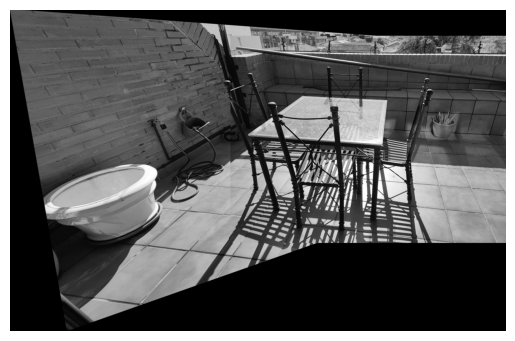

In [19]:
import matplotlib.pyplot as plt

# Cargar la imagen panorámica
img_panoramica = cv2.imread('panorama_ransac.jpg')

# Mostrar la imagen panorámica
plt.imshow(img_panoramica)
plt.axis('off')
plt.show()

**b) Modificar el parámetro method de la función cv.findHomography para que utilice tanto el algoritmo RANSAC como el método de mínimos cuadrados.**


Aunque para que funcionase en el caso anterior ya he modificado el método para usar RANSAC, pongo aquí los cambios que tendríamos que hacer para usar RANSAC o mínimos cuadrados

#### Original
M, mask = cv2.findHomography(src_pts, dst_pts, method, 5.0)

#### RANSAC
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


#### Minimo cuadrados
M, mask = cv2.findHomography(src_pts, dst_pts, 0, 5.0)



**c) Comentar los umbrales utilizados en cada uno de los casos así como las
diferencias obtenidas en el resultado.**

Para ransac he obtenido un rendimiento muy bueno con un valor de umbral/treshold de 0.8, he decidido usar este umbral ya que ha partir de este umbral y con un umbral entre 0.8 y 0.9 la conexión entre las dos imágenes es mas natural a la hora de formar la panorámica, en cambio usando mínimos cuadrados con un valor de umbral más bajo, que en mi caso es 0.6 he conseguido otro resultado muy satisfactorio, aunque en mi opinión el resultado de RANSAC se ve un pelín mejor ya que aunque las sillas quizás no están perfectas conectadas, el suelo se ve mejor por donde esta las juntas del suelo

Es decir, que mientrás que ransac me da un mejor resultado con menos valores ya que el umbral está mas alto , en mínimos cuadrado he logrado un resultado casi idéntico pero con un umbral inferior haciendo que las correspondencias sean mayores aunque menos confiables

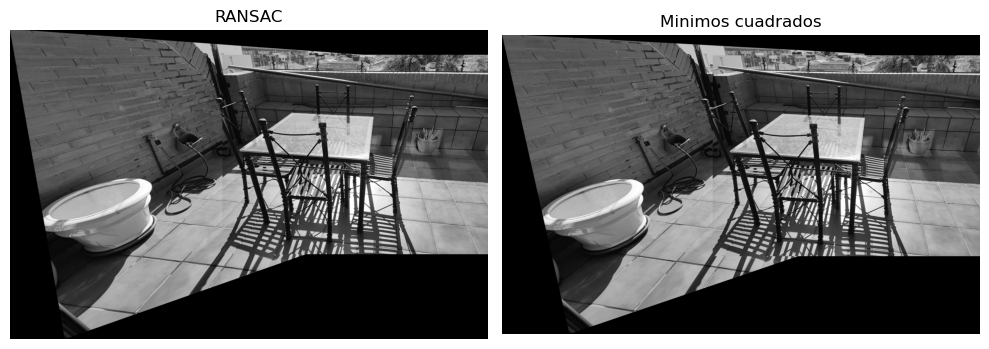

In [11]:
imagen1 = cv2.imread('panorama_ransac.jpg')
imagen2 = cv2.imread('panorama_result_cuadrados.jpg')

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].imshow(imagen1)
axs[0].set_title('RANSAC')
axs[0].axis('off')

axs[1].imshow(imagen2)
axs[1].set_title('Minimos cuadrados')
axs[1].axis('off')

plt.tight_layout()

plt.show()

# Bibliografia

https://mikhail-kennerley.medium.com/a-comparison-of-sift-surf-and-orb-on-opencv-59119b9ec3d0

https://docs.opencv.org/4.x/d7/dfc/group__highgui.html

https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html

https://docs.opencv.org/4.9.0/dc/dc3/tutorial_py_matcher.html

diapositivas de visión por ordenador de la enseñanza virtual 